$ y = 1.477x + 0.089 $

In [1]:
import numpy as np
import tensorflow as tf

$ y = 1.477x + 0.089 + \epsilon, \epsilon \in N(\mu,\sigma^2) $

In [2]:
d = []
e = []
for i in range(100):
    x = np.random.uniform(-10., 10.)
    # np.random.normal(mu, sigma, size)
    eps = np.random.normal(0., 0.01)
    e.append(eps)
    y = 1.477 * x + 0.089 + eps
    d.append([x, y])
    
# print(d)


In [3]:
data = np.array(d)

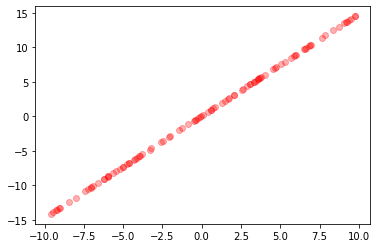

In [4]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

# plt.hist(e)
plt.plot(data[:,0], data[:,1], 'ro', alpha=0.3)

$ MSE: L = \dfrac{1}{n}\sum_{i=1}^{n}(y_{i} - (wx_{i} + b))^2 $   

In [5]:
# mean squared error
def mse(w, b, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (w * x + b)) ** 2
    return totalError / float(len(points))

In [6]:
def step_gradient(w_current, b_current, points, lr):
    
    w_gradient = 0
    b_gradient = 0
    
    M = float(len(points))
    
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        w_gradient += (2/M) * x * ((w_current * x + b_current) - y)
        b_gradient += (2/M) * ((w_current * x + b_current) - y)
        
    new_w = w_current - (lr * w_gradient)
    new_b = b_current - (lr * b_gradient)
    
    return (new_w, new_b)

In [7]:
l = []
def gradient_descent(points, starting_w, starting_b, lr, num_iterations):
    
    w = starting_w
    b = starting_b
    
    for step in range(num_iterations):
        w, b = step_gradient(w, b, np.array(points), lr)
        loss = mse(w, b, points)
        l.append(loss)
        if step % 50 == 0:
            print(f"iteration:{step}, loss:{loss}, w:{w}, b:{b}")
    
    return [w, b]

iteration:0, loss:9.938258304925863, w:0.9092569727924843, b:0.0065847055449297035
iteration:50, loss:0.0009468198937138392, w:1.4770783095887696, b:0.06004648439767701
iteration:100, loss:0.0002240439144760246, w:1.4769780006557756, b:0.07840169713865919
iteration:150, loss:0.0001280155876236569, w:1.476941438025035, b:0.08509217669598658
iteration:200, loss:0.00011525722289799029, w:1.47692811093714, b:0.08753085813970933
iteration:250, loss:0.00011356214108402528, w:1.4769232532103251, b:0.08841975812557723
iteration:300, loss:0.00011333693178660957, w:1.4769214825677068, b:0.0887437623889917
iteration:350, loss:0.00011330701038268484, w:1.4769208371680371, b:0.08886186202267345
iteration:400, loss:0.000113303035012117, w:1.4769206019196988, b:0.08890490936818919
iteration:450, loss:0.00011330250684267531, w:1.4769205161716215, b:0.08892060013621433
iteration:500, loss:0.00011330243666985629, w:1.4769204849164264, b:0.08892631942501758
iteration:550, loss:0.00011330242734666459, w:1

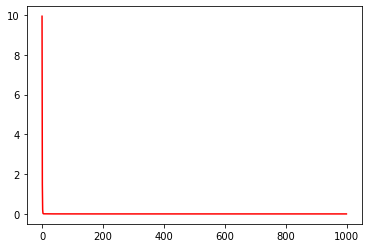

In [8]:
def main():
    lr = 0.01
    initial_w = 0
    initial_b = 0
    num_iterations = 1000
    [w, b] = gradient_descent(data, initial_w, initial_b, lr, num_iterations)
    loss = mse(w, b, data)
#     l.append(loss)
    print(f"Final loss:{loss}, w:{w}, b:{b}")
    plt.plot(range(num_iterations), l, 'r-')
    
main()  

